<a href="https://colab.research.google.com/github/Bekamgenene/Elevvo-Internship-Program/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 2: Customer Segmentation

**Step 1: Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Step 2: Load dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Mall_Customers.csv")

Saving Mall_Customers.csv to Mall_Customers (1).csv


**Step 3: Select features (Annual Income & Spending Score)**

In [9]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

**Step 4: Scale the data**


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Step 5 : Find optimal clusters using Elbow Method**

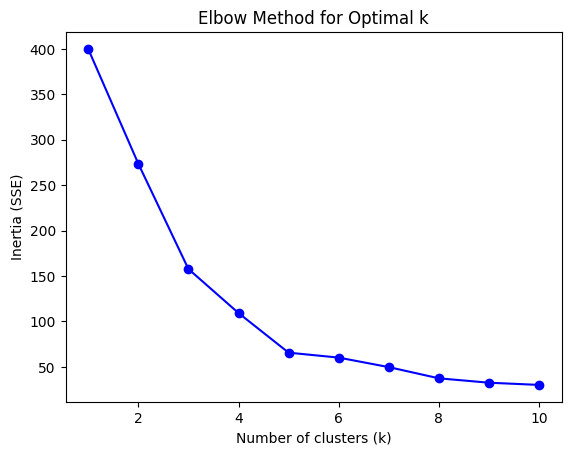

In [11]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

**Step 6: Train K-Means with optimal k**

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["Cluster"] = clusters


**Step 7: Visualize clusters**

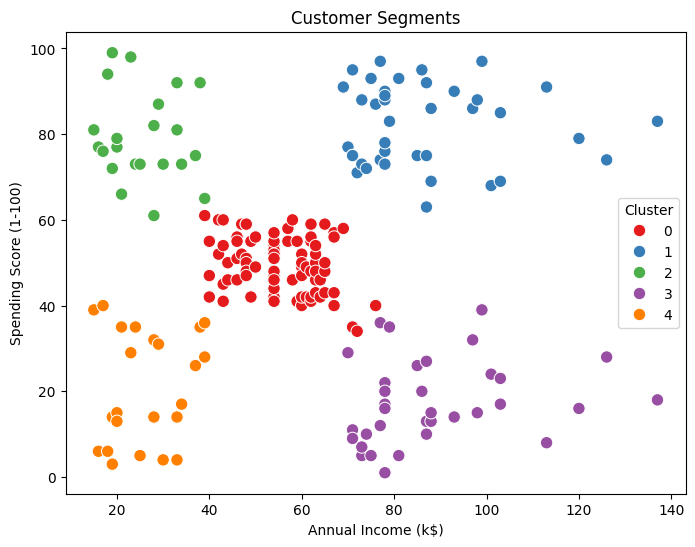

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["Annual Income (k$)"],
                y=data["Spending Score (1-100)"],
                hue=data["Cluster"],
                palette="Set1", s=80)
plt.title("Customer Segments")
plt.show()


**Step 8:  Analyze clusters**

In [14]:
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391


**BONES STEPS**

*Step 1: DBSCAN Clustering*

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
# DBSCAN works better on scaled data
dbscan = DBSCAN(eps=1.2, min_samples=5)  # eps may need tuning
db_clusters = dbscan.fit_predict(X_scaled)



In [17]:
# Add DBSCAN cluster labels to the dataset
data["DBSCAN_Cluster"] = db_clusters



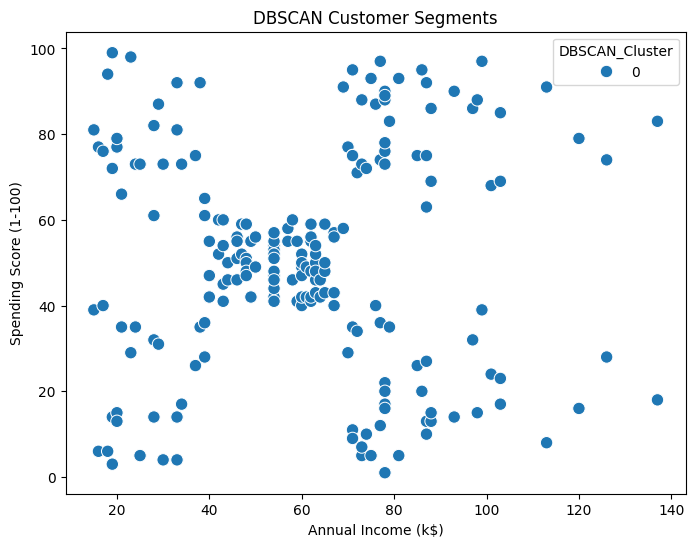

DBSCAN Cluster Summary:
                Annual Income (k$)  Spending Score (1-100)    Age
DBSCAN_Cluster                                                   
0                            60.56                    50.2  38.85


In [18]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["Annual Income (k$)"],
                y=data["Spending Score (1-100)"],
                hue=data["DBSCAN_Cluster"],
                palette="tab10", s=80)
plt.title("DBSCAN Customer Segments")
plt.show()

# Analyze DBSCAN clusters
dbscan_summary = data.groupby("DBSCAN_Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()
print("DBSCAN Cluster Summary:")
print(dbscan_summary)

***Step 2: Average Spending per KMeans Cluster***

In [19]:
avg_spending = data.groupby("Cluster")["Spending Score (1-100)"].mean()
print("\nAverage Spending Score per KMeans Cluster:")
print(avg_spending)


Average Spending Score per KMeans Cluster:
Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


**Save the dataset with cluster labels**

In [22]:
data.to_csv("Customer_Segmentation_Result.csv", index=False)
print("\nClustered data saved as 'Customer_Segmentation_Result.csv'")


Clustered data saved as 'Customer_Segmentation_Result.csv'
